# <font color='red'> Project 1

### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

### Classification task:
- Decide aboute a good evaluation strategy and justify your choice.
- Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding project:
- Post your queries related to project on discussion board on e-learning. There is high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through mail.

---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

In [592]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

### Reading Both the DataSet

In [593]:
audit_risk = pd.read_csv("audit_risk.csv")
trial = pd.read_csv("trial.csv")

In [594]:
audit_risk.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [595]:
trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [596]:
#Removing duplicate data from the datasets

trial=trial.drop_duplicates(keep='first')
audit_risk=audit_risk.drop_duplicates(keep='first')

print(trial.shape)
print(audit_risk.shape)

(763, 18)
(763, 27)


### Merging the Dataset

__Modifications__

1) Changing datatypes so that common columns have same datatype

2) Changing names so that common columns have same names

3) Scaling down Score_A and Score_B by 10^-1 in trial dataset.

4) Chaging names of the columns--> Score_b.1 to Score_C and Scpre_MV to Score_D

In [597]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      763 non-null float64
LOCATION_ID       763 non-null object
PARA_A            763 non-null float64
Score_A           763 non-null float64
Risk_A            763 non-null float64
PARA_B            763 non-null float64
Score_B           763 non-null float64
Risk_B            763 non-null float64
TOTAL             763 non-null float64
numbers           763 non-null float64
Score_B.1         763 non-null float64
Risk_C            763 non-null float64
Money_Value       762 non-null float64
Score_MV          763 non-null float64
Risk_D            763 non-null float64
District_Loss     763 non-null int64
PROB              763 non-null float64
RiSk_E            763 non-null float64
History           763 non-null int64
Prob              763 non-null float64
Risk_F            763 non-null float64
Score             763 non-null float64
Inherent_Risk     763 non-null float64
CON

In [598]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     763 non-null float64
LOCATION_ID      763 non-null object
PARA_A           763 non-null float64
SCORE_A          763 non-null int64
PARA_B           763 non-null float64
SCORE_B          763 non-null int64
TOTAL            763 non-null float64
numbers          763 non-null float64
Marks            763 non-null int64
Money_Value      762 non-null float64
MONEY_Marks      763 non-null int64
District         763 non-null int64
Loss             763 non-null int64
LOSS_SCORE       763 non-null int64
History          763 non-null int64
History_score    763 non-null int64
Score            763 non-null float64
Risk             763 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 113.3+ KB


In [599]:
#converting Datatypes

# Replace all occurrences of Not Available with numpy not a number
#data = data.replace({'Not Available': np.nan})

# Iterate through the columns
for col in list(trial.columns):
    # Select columns that should be numeric
    if ('SCORE_A' in col or 'SCORE_B' in col or 'Marks' in col or 'District' in col or
       'Loss' in col or 'LOSS_SCORE' in col or 'History_score' in col or 'History' in col or 'Risk' in col):
        # Convert the data type to float
        trial[col] = trial[col].astype(float)



trial.info()

#trial.SCORE_A = trial.SCORE_A.astype(float)
#trial.SCORE_B = trial.SCORE_B.astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     763 non-null float64
LOCATION_ID      763 non-null object
PARA_A           763 non-null float64
SCORE_A          763 non-null float64
PARA_B           763 non-null float64
SCORE_B          763 non-null float64
TOTAL            763 non-null float64
numbers          763 non-null float64
Marks            763 non-null float64
Money_Value      762 non-null float64
MONEY_Marks      763 non-null float64
District         763 non-null float64
Loss             763 non-null float64
LOSS_SCORE       763 non-null float64
History          763 non-null float64
History_score    763 non-null float64
Score            763 non-null float64
Risk             763 non-null float64
dtypes: float64(17), object(1)
memory usage: 113.3+ KB


In [600]:
#changing Names
trial.rename(columns={'SCORE_B': 'Score_B'}, inplace=True)
trial.rename(columns={'SCORE_A': 'Score_A'}, inplace=True)

#Scaling down Score_A and Score_B
trial['Score_A'] = trial['Score_A'].apply(lambda x: x/10)
trial['Score_B'] = trial['Score_B'].apply(lambda x: x/10)

In [601]:
trial.shape

(763, 18)

In [602]:
list(audit_risk.columns.values)

['Sector_score',
 'LOCATION_ID',
 'PARA_A',
 'Score_A',
 'Risk_A',
 'PARA_B',
 'Score_B',
 'Risk_B',
 'TOTAL',
 'numbers',
 'Score_B.1',
 'Risk_C',
 'Money_Value',
 'Score_MV',
 'Risk_D',
 'District_Loss',
 'PROB',
 'RiSk_E',
 'History',
 'Prob',
 'Risk_F',
 'Score',
 'Inherent_Risk',
 'CONTROL_RISK',
 'Detection_Risk',
 'Audit_Risk',
 'Risk']

In [603]:
list(trial.columns.values)

['Sector_score',
 'LOCATION_ID',
 'PARA_A',
 'Score_A',
 'PARA_B',
 'Score_B',
 'TOTAL',
 'numbers',
 'Marks',
 'Money_Value',
 'MONEY_Marks',
 'District',
 'Loss',
 'LOSS_SCORE',
 'History',
 'History_score',
 'Score',
 'Risk']

In [604]:
#Finding common columns:

list1 = list(audit_risk.columns)
list2 = list(trial.columns)
col = list(set(list1) & (set(list2)))
print(col)

['PARA_B', 'Score', 'Money_Value', 'Sector_score', 'TOTAL', 'Score_A', 'Risk', 'Score_B', 'numbers', 'History', 'LOCATION_ID', 'PARA_A']


In [605]:
#merging dataframes using join
audit_data = pd.merge(audit_risk, trial, on=['Sector_score',
                                        'LOCATION_ID',
                                        'Score_A',
                                        'Score_B',
                                        'PARA_A',
                                        'PARA_B',
                                        'TOTAL', 
                                        'numbers',
                                        'Money_Value',
                                        'History',
                                        'Score',
                                        'Risk'], how='left')

In [606]:
audit_data.shape

(763, 33)

In [607]:
audit_data.rename(columns={'Score_B.1': 'Score_C'}, inplace=True)
audit_data.rename(columns={'Score_MV': 'Score_D'}, inplace=True)
audit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 762
Data columns (total 33 columns):
Sector_score      763 non-null float64
LOCATION_ID       763 non-null object
PARA_A            763 non-null float64
Score_A           763 non-null float64
Risk_A            763 non-null float64
PARA_B            763 non-null float64
Score_B           763 non-null float64
Risk_B            763 non-null float64
TOTAL             763 non-null float64
numbers           763 non-null float64
Score_C           763 non-null float64
Risk_C            763 non-null float64
Money_Value       762 non-null float64
Score_D           763 non-null float64
Risk_D            763 non-null float64
District_Loss     763 non-null int64
PROB              763 non-null float64
RiSk_E            763 non-null float64
History           763 non-null int64
Prob              763 non-null float64
Risk_F            763 non-null float64
Score             763 non-null float64
Inherent_Risk     763 non-null float64
CON

## Data Cleaning and Formatting

In [608]:
# Statistics for each column
audit_data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_C,Risk_C,Money_Value,Score_D,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,762.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.0,763.000000,763.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,19.721311,2.491298,0.353866,1.373919,10.983474,0.315072,6.441822,13.442532,5.068807,0.224115,1.155570,14.378824,0.292529,8.406261,2.508519,0.206291,0.520052,0.106160,0.217038,0.054522,2.714024,17.956720,0.574574,0.5,7.284109,0.398427,2.309278,3.192440,2.580756,0.036082,2.075601,2.219931
std,24.132399,5.718259,0.174398,3.465152,50.489113,0.170597,30.316831,51.719679,0.266546,0.080974,0.541607,67.147169,0.160656,40.295660,1.230994,0.037818,0.291352,0.535365,0.068529,0.308352,0.861574,55.163921,0.447253,0.0,38.985618,0.489895,0.909247,1.744648,1.347979,0.204267,0.416265,0.773762
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,0.260000,0.200000,0.052000,0.000000,0.200000,0.000000,0.590000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.593000,0.400000,0.5,0.318600,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.900000,0.200000,0.180000,0.440000,0.200000,0.088000,1.420000,5.000000,0.200000,1.000000,0.110000,0.200000,0.022000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.238000,0.400000,0.5,0.590000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.515000,0.600000,1.509000,4.365000,0.400000,2.104000,7.990000,5.000000,0.200000,1.000000,5.965000,0.400000,2.364000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.400000,10.960000,0.400000,0.5,3.452800,1.000000,2.000000,6.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


__Missing Values__

In [609]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [610]:
missing_values_table(audit_data)

Your selected dataframe has 33 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Marks,181,23.7
MONEY_Marks,181,23.7
District,181,23.7
Loss,181,23.7
LOSS_SCORE,181,23.7
History_score,181,23.7
Money_Value,1,0.1


In [611]:
# comparing similar columns to check iof they have similar values or not

# we can see that district all the below columns have 181 false values which are same as the missing values. This is due to the right outter join.
# And the true values are same as the columns with which they are compared 

df = audit_data['District'] == audit_data['District_Loss']
print("for Columns district and district_loss\n")
print(df.value_counts())

# Score_D has same value as MONEY_marks/10
df1 = audit_data['Score_D'] == audit_data['MONEY_Marks']/10
print("\nfor Columns Score_D and Money_Marks\n")
print(df1.value_counts())

# Score_C has same value as Marks/10
df3 = audit_data['Score_C'] == audit_data['Marks']/10
print("\nfor Columns Score_C and Marks\n")
print(df1.value_counts())

# prob has same value as Loss_Score/10
df2 = audit_data['Prob'] == audit_data['LOSS_SCORE']/10
print("\nfor Columns Prob and LOSS_SCORE\n")
print(df1.value_counts())


#also column loss is dependent on column prob --> 0 = 0.2, 1 = 0.4, 2 = 0.6

#Hence we can drop all these columns
audit_data.drop(['LOSS_SCORE', 'Loss', 'MONEY_Marks', 'District', 'Marks'], axis=1, inplace = True)

for Columns district and district_loss

True     582
False    181
dtype: int64

for Columns Score_D and Money_Marks

True     582
False    181
dtype: int64

for Columns Score_C and Marks

True     582
False    181
dtype: int64

for Columns Prob and LOSS_SCORE

True     582
False    181
dtype: int64


In [612]:
#Column history has 7 unique values, which are 0,1,2,3,4,5,9
#if the value in history is 0 then column History_Score has value 2,  
#if the value in history is 1 then column History_Score has value 4
#if the value in history is 2,3,4,5,9 then column History_Score has value 6
#We will use the same condition to replace the missing values in History_score

audit_data.loc[audit_data.History == 0, 'History_score'] = 2
audit_data.loc[audit_data.History == 1, 'History_score'] = 4
audit_data.loc[audit_data.History == 2, 'History_score'] = 6
audit_data.loc[audit_data.History == 3, 'History_score'] = 6
audit_data.loc[audit_data.History == 4, 'History_score'] = 6
audit_data.loc[audit_data.History == 5, 'History_score'] = 6
audit_data.loc[audit_data.History == 9, 'History_score'] = 6


#filling the missing value in money value by the mean of the column
print(audit_data['Money_Value'].mean())
audit_data['Money_Value'].fillna(audit_data['Money_Value'].mean(),inplace=True)

14.378824146981643


In [613]:
audit_data.tail(5)  

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_C,Risk_C,Money_Value,Score_D,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,History_score
758,55.57,18,0.75,0.2,0.150,0.45,0.2,0.090,1.20,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.640,0.4,0.5,0.3280,0,2.0
759,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0,2.0
760,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0,2.0
761,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0,2.0
762,55.57,15,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,1.0,0.32,0.2,0.064,2,0.2,0.4,0,0.2,0.0,2.0,1.464,0.4,0.5,0.2928,0,2.0


In [614]:
#checking for missing values
audit_data.columns[audit_data.isnull().any()].tolist()

[]

In [615]:
audit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 762
Data columns (total 28 columns):
Sector_score      763 non-null float64
LOCATION_ID       763 non-null object
PARA_A            763 non-null float64
Score_A           763 non-null float64
Risk_A            763 non-null float64
PARA_B            763 non-null float64
Score_B           763 non-null float64
Risk_B            763 non-null float64
TOTAL             763 non-null float64
numbers           763 non-null float64
Score_C           763 non-null float64
Risk_C            763 non-null float64
Money_Value       763 non-null float64
Score_D           763 non-null float64
Risk_D            763 non-null float64
District_Loss     763 non-null int64
PROB              763 non-null float64
RiSk_E            763 non-null float64
History           763 non-null int64
Prob              763 non-null float64
Risk_F            763 non-null float64
Score             763 non-null float64
Inherent_Risk     763 non-null float64
CON

In [616]:
# We can see that Location_Id is of object type that means it has some strings values in it:
audit_data['N_LOCATION_ID'] =audit_data['LOCATION_ID'].apply(lambda x: np.where(x.isdigit(),x,'0'))
audit_data['N_LOCATION_ID'] = audit_data['N_LOCATION_ID'].astype(float)
# We have a new column for Location_Id with name N_LOCATION_ID thus we can drop the previous one now:
audit_data.drop(['LOCATION_ID'], axis=1, inplace = True)

In [617]:
audit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 762
Data columns (total 28 columns):
Sector_score      763 non-null float64
PARA_A            763 non-null float64
Score_A           763 non-null float64
Risk_A            763 non-null float64
PARA_B            763 non-null float64
Score_B           763 non-null float64
Risk_B            763 non-null float64
TOTAL             763 non-null float64
numbers           763 non-null float64
Score_C           763 non-null float64
Risk_C            763 non-null float64
Money_Value       763 non-null float64
Score_D           763 non-null float64
Risk_D            763 non-null float64
District_Loss     763 non-null int64
PROB              763 non-null float64
RiSk_E            763 non-null float64
History           763 non-null int64
Prob              763 non-null float64
Risk_F            763 non-null float64
Score             763 non-null float64
Inherent_Risk     763 non-null float64
CONTROL_RISK      763 non-null float64
De

__Exploratory Data Analysis__

Exploratory Data Analysis (EDA) is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships. These may be interesting by themselves (for example finding a correlation between two variables) or they can be used to inform modeling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine.

To begin the EDA, we will focus on a single variable, the Audit Risk & Risk, because these are the target variables for our machine learning models.

Text(0.5, 1.0, 'Audit Risk - Density Plot')

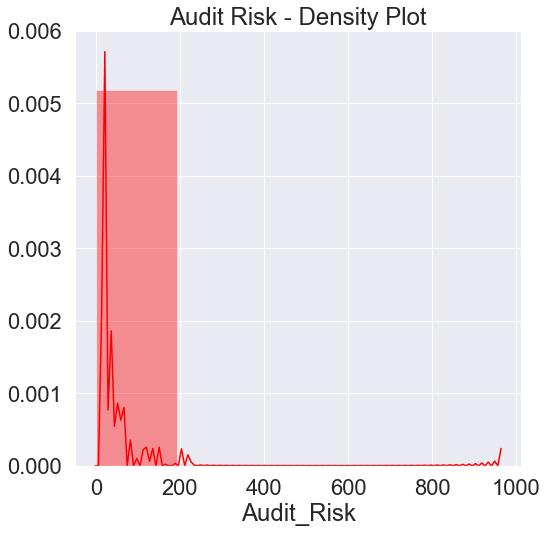

In [618]:
figsize(8, 8)

data = audit_data['Audit_Risk']

# Histogram of Audit Risk column
plt.title('Audit Risk - Density Plot')
sns.set_color_codes("dark")
sns.distplot(audit_data['Audit_Risk'],kde=True,bins=5, color="red")
plt.show()

In [619]:
#We can see from the above curve that there are some outliers ranging to 900 as well and we need to treat them:
print(np.percentile(audit_data['Audit_Risk'], .95))
audit_data['Audit_Risk'].describe()

0.28


count    763.000000
mean       7.284109
std       38.985618
min        0.280000
25%        0.318600
50%        0.590000
75%        3.452800
max      961.514400
Name: Audit_Risk, dtype: float64

In [620]:
audit_data['Audit_Risk'].dropna().sort_values().tail(10)

125     68.7432
247     82.5248
39     115.5016
81     116.7376
341    124.5676
484    134.7624
482    149.8176
492    204.7808
582    222.0096
241    961.5144
Name: Audit_Risk, dtype: float64

Few firms have the audit risk rating way above the rest with the highest being 962

In [621]:
#It might be worthwhile for someone to follow up with this firm and check what is happening here.
audit_data.loc[audit_data['Audit_Risk'] == 961.5144, :]

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_C,Risk_C,Money_Value,Score_D,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,History_score,N_LOCATION_ID
241,2.72,4.28,0.6,2.568,1264.63,0.6,758.778,1268.91,5.5,0.4,2.2,58.86,0.6,35.316,6,0.2,1.2,2,0.6,1.2,5.2,801.262,2.4,0.5,961.5144,1,6.0,2.0


Text(0.5, 1.0, 'Default paymnet count bar chart')

Text(0.5, 0, 'Default payment Class')

Text(0, 0.5, 'Frequency')

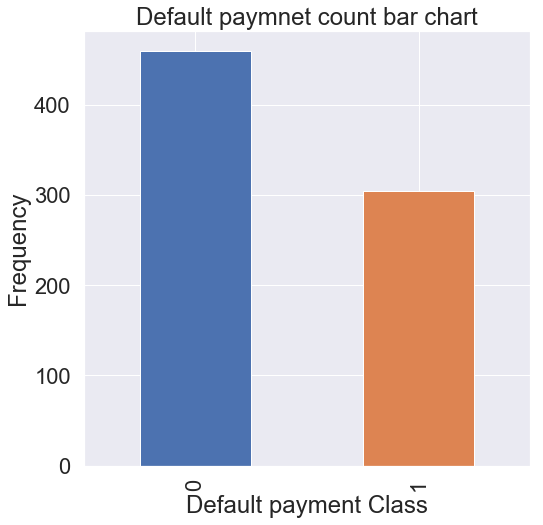

In [622]:
#Single Variable Plots:
count_default_payments = pd.value_counts(audit_data['Risk'], sort = True).sort_index()
count_default_payments.plot(kind = 'bar')
plt.title("Default paymnet count bar chart")
plt.xlabel("Default payment Class")
plt.ylabel("Frequency")
plt.show()

 From the above graph we can see that almost 40% of the firms are going to be the fraudalent firms

__Removing Outliers__

In [623]:
# A number "a" from the vector "x" is an outlier if a > median(x)+1.5*iqr(x) or a < median-1.5*iqr(x)
# iqr: interquantile range = third interquantile - first interquantile


def outliers(x): 
       return np.abs(x- x.median()) > 1.5*(x.quantile(.75)-x.quantile(0.25))

# Give the outliers for the Audit_Risk column for example
len(audit_data['Sector_score'][outliers(audit_data['Audit_Risk'])])

#The function return a boolean vector: True if the element is an outlier. False, otherwise.
#outliers(audit_data['Audit_Risk'])

153

In [624]:
#Now, to replace the upper and lower outliers, let's write another small function and apply it on all the dataframe:
# Replace the upper outlier(s) with the 95th percentile and the lower one(s) with the 5th percentile 

#def replace(x):   # x is a vector
#    out = x[outliers(x)]    
#    return x.replace(to_replace = [out.min(),out.max()], 
#                        value = [np.percentile(x,5),np.percentile(x,95)])

def replace(x):
    uper_cutoff = np.median(x) + 1.5*(x.quantile(.75)-x.quantile(0.25))
    lower_cutoff = np.median(x) - 1.5*(x.quantile(.75)-x.quantile(0.25))
    x_5per = np.percentile(x,5)
    x_95per = np.percentile(x,95)
    return x.apply(lambda x: x_95per if x > uper_cutoff else (x_5per if x< lower_cutoff else x))

In [625]:
# Apply replace() on each column of the dataframe except risk coloumns as that is our binary coloumn.

audit_data1 = audit_data.drop(columns= "Risk", axis= 1)

audit_data1 = audit_data1.apply(replace,axis=0)

#Finally, remove the rows containing any outlier:
#audit_data1 = audit_data1[~audit_data.apply(outliers).any(axis=1)]

audit_data1['Risk'] = audit_data['Risk']

In [626]:
print(audit_data.shape)
audit_data1.shape

(763, 28)


(763, 28)

__Checking if outliers have been removed or not__

In [627]:
#Checking the distribution in Audit data
audit_data1['Audit_Risk'].describe()

count    763.000000
mean       6.585877
std       11.371315
min        0.280000
25%        0.318600
50%        0.590000
75%        3.452800
max       29.197920
Name: Audit_Risk, dtype: float64

In [628]:
audit_data.Risk.describe()

count    763.000000
mean       0.398427
std        0.489895
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Risk, dtype: float64

Text(0.5, 1.0, 'Audit Risk - Density Plot')

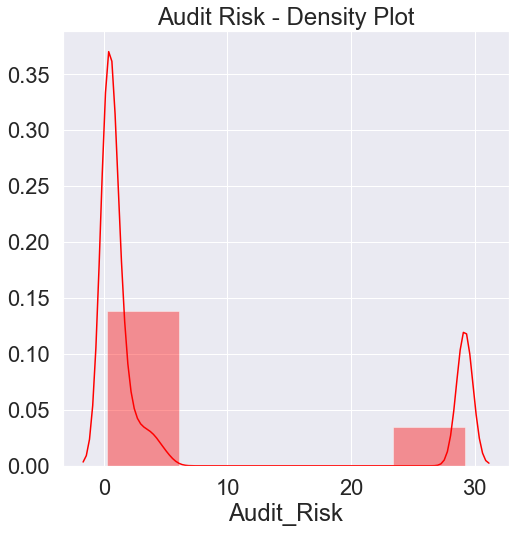

In [629]:
figsize(8, 8)

data = audit_data1['Audit_Risk']

# Histogram of Audit Risk column
plt.title('Audit Risk - Density Plot')
sns.set_color_codes("dark")
sns.distplot(audit_data1['Audit_Risk'],kde=True,bins=5, color="red")
plt.show()

# Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.


In [630]:
!pip install pandas_profiling

In [631]:
import warnings
warnings.filterwarnings('ignore')

# importing the packages for regression

import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
import pandas_profiling
#import missingno as msno
#import impyute
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
import math 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

%matplotlib inline

pd.set_option('max_columns', 100)

In [632]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [633]:
# Droping the "Risk" col and preforming the regression task.
audit_data = audit_data1.drop("Risk", axis=1)

In [634]:
print(audit_data.head())
pandas_profiling.ProfileReport(audit_data)

   Sector_score  PARA_A  Score_A  Risk_A  PARA_B  Score_B   Risk_B  TOTAL  \
0          3.89    4.18      0.6  5.9982   2.500      0.2   0.5000   6.68   
1          3.89    0.00      0.2  0.0000   4.830      0.2   0.9660   4.83   
2          3.89    0.51      0.2  0.1020   0.230      0.2   0.0460   0.74   
3          3.89    0.00      0.2  0.0000  62.172      0.6  37.3032  10.80   
4          3.89    0.00      0.2  0.0000   0.080      0.2   0.0160   0.08   

   numbers  Score_C  Risk_C  Money_Value  Score_D  Risk_D  District_Loss  \
0      5.0      0.2     1.0         3.38      0.2   0.676            2.0   
1      5.0      0.2     1.0         0.94      0.2   0.188            2.0   
2      5.0      0.2     1.0         0.00      0.2   0.000            2.0   
3      5.5      0.4     2.2        62.95      0.6  37.770            2.0   
4      5.0      0.2     1.0         0.00      0.2   0.000            2.0   

   PROB  RiSk_E  History  Prob  Risk_F  Score  Inherent_Risk  CONTROL_RISK  \
0 

Number of variables,27
Number of observations,763
Total Missing (%),0.0%
Total size in memory,166.9 KiB
Average record size in memory,224.0 B
Numeric,9
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,14


### From the above profiling output below are the cols which we are droping.
Detection_Risk has constant value 0.5 Rejected  <br>
History_score is highly correlated with Risk_F (ρ = 1) Rejected <br>
PROB has constant value 0.2 Rejected <br>
Prob is highly correlated with History (ρ = 1) Rejected <br>
RiSk_E is highly correlated with District_Loss (ρ = 0.93049) Rejected <br>
Risk_A is highly correlated with PARA_A (ρ = 0.96872) Rejected <br>
Risk_B is highly correlated with PARA_B (ρ = 0.95731) Rejected <br>
Risk_C is highly correlated with Score_C (ρ = 1) Rejected <br>
Risk_D is highly correlated with Score_D (ρ = 0.99996) Rejected <br>
Risk_F is highly correlated with Prob (ρ = 1) Rejected <br>
Score is highly correlated with Score_B (ρ = 0.90826) Rejected <br>
Score_C is highly correlated with numbers (ρ = 1) Rejected <br>
Score_D is highly correlated with Money_Value (ρ = 0.91612) Rejected <br>

In [635]:
col_drop = ['Detection_Risk', 'History_score','PROB','Prob', 'RiSk_E','Risk_A','Risk_B', 'Risk_C', 'Risk_D','Risk_F','Score','Score_C','Score_D']

In [687]:
print(list(audit_data.columns))
audit_data.drop(columns=col_drop, axis=1, inplace=True)
print("------------------------------------------------------------------------------------------------------------")

print(list(audit_data.columns))

['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_C', 'Risk_C', 'Money_Value', 'Score_D', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk', 'History_score', 'N_LOCATION_ID', 'Risk']
------------------------------------------------------------------------------------------------------------
['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'District_Loss', 'History', 'Inherent_Risk', 'CONTROL_RISK', 'N_LOCATION_ID', 'Risk']


In [637]:
y = audit_data['Audit_Risk']
x = audit_data.drop('Audit_Risk', axis=1)

In [638]:
# Partition the dataset in train + validation sets
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (572, 13)
X_test : (191, 13)
y_train : (572,)
y_test : (191,)


### Regression Techniques

__KNN Regressor__

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=6, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=8, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=9, p=2,
          weights='uniform')

Text(0.5, 0, 'k')

Text(0, 0.5, 'MSE')

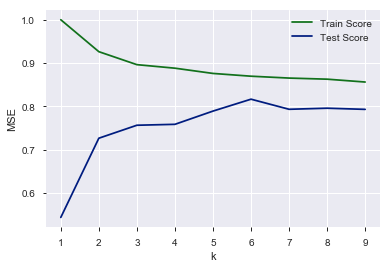

In [639]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [640]:
#Based on above graph we selected 3 as the best number of neighbours
knn_reg1 = KNeighborsRegressor(6)
knn_reg1.fit(X_train, y_train)
print(knn_reg1.score(X_train, y_train))
print(knn_reg1.score(X_test, y_test))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=6, p=2,
          weights='uniform')

0.8696661184651624
0.8166336374391738


## KNN Regressor with Grid Search

In [641]:
# we will now use grid search and cross-validation

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':range(1,10),'weights': ['distance','uniform']}
model = GridSearchCV(knn_reg, params)
model.fit(X_train,y_train)
model.best_params_

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=9, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 10), 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'n_neighbors': 8, 'weights': 'uniform'}

In [642]:
#Train the model using the training sets
from sklearn import metrics
model.fit(X_train, y_train)

print ("Train Score:",model.score(X_train, y_train))
print ("Test Score :",model.score(X_test, y_test))

#Predict the response for test dataset
y_pred = model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_Score:",r2_score(y_test, y_pred))

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=9, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 10), 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Train Score: 0.8628190422750945
Test Score : 0.795809864862862
MAE: 1.7756158272251283
MSE: 23.007556171967725
RMSE: 4.7966192440059
r2_Score: 0.795809864862862


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='uniform')

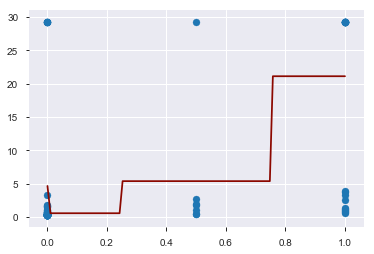

In [643]:
X_b = X_train[:100,4].reshape(-1,1)
y_b = y_train[:100]

knn_reg = KNeighborsRegressor(7)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 100).reshape(100, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

## Linear Regression

In [644]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
yPrediction = lreg.predict(X_test)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

0.850858815106072
0.780663462091889


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 0, 'RM')

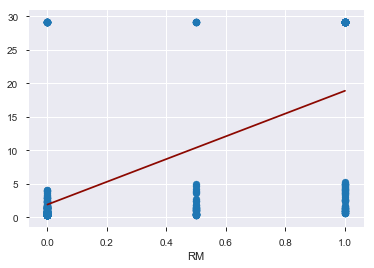

In [645]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,4].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

In [646]:
from sklearn import metrics
print("Intercept:",lreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, yPrediction))
print('MSE:', metrics.mean_squared_error(y_test, yPrediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPrediction)))

from sklearn.metrics import r2_score
print("r2_Score:",r2_score(y_test, yPrediction))

Intercept: 1.9045666361225102
MAE: 2.394078474300001
MSE: 24.71420920063809
RMSE: 4.9713387734732075
r2_Score: 0.780663462091889


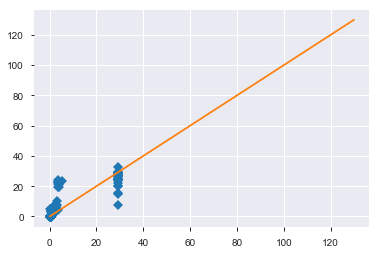

In [647]:
# plot prediction and actual data
plt.plot(y_test, yPrediction, 'D')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 130, 10)
y = x
plt.plot(x, y)
plt.show()

__SGD Regressor__

In [648]:
from sklearn.linear_model import SGDRegressor
# Establish a model
sgd_reg = SGDRegressor()

param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'max_iter':[10000],
    'tol': [0.0001]
}
clf = GridSearchCV(sgd_reg, param_grid)
clf.fit(X_train, y_train)
print("Best score for train data: " + str(clf.best_score_))
clf.fit(X_test, y_test)
print("Best score for test data: " + str(clf.best_score_))
print(clf.best_params_)
yPrediction1=clf.predict(X_test)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'loss': ['squared_loss', 'huber', 'epsilon_insensitive'], 'penalty': ['l2', 'l1', 'elasticnet'], 'learning_rate': ['constant', 'optimal', 'invscaling'], 'max_iter': [10000], 'tol': [0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best score for train data: 0.8284983396560861


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'loss': ['squared_loss', 'huber', 'epsilon_insensitive'], 'penalty': ['l2', 'l1', 'elasticnet'], 'learning_rate': ['constant', 'optimal', 'invscaling'], 'max_iter': [10000], 'tol': [0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best score for test data: 0.7554848324204758
{'alpha': 0.1, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 10000, 'penalty': 'l1', 'tol': 0.0001}


MAE: 2.7574917234422784
MSE: 22.279324882099253
RMSE: 4.720097973781821
r2_Score: 0.8022728566025282


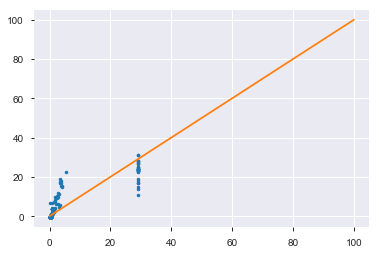

In [649]:
print('MAE:', metrics.mean_absolute_error(y_test, yPrediction1))
print('MSE:', metrics.mean_squared_error(y_test, yPrediction1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yPrediction1)))
print("r2_Score:",r2_score(y_test, yPrediction1))



# plot prediction and actual data
plt.plot(y_test, yPrediction1, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 100, 10)
y = x
plt.plot(x, y)
plt.show()

__Polynomial Regression__

In [650]:
from sklearn.preprocessing import PolynomialFeatures

train_score_list = []
test_score_list = []

for n in range(1,2):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

print("Train mean Score:",sum(train_score_list)/len(train_score_list))
print("Test mean Score:",sum(test_score_list)/len(test_score_list))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Train mean Score: 0.850858815106072
Test mean Score: 0.7806634620918889


In [651]:
#dictionary for storing the RMSE and R2 of different model.
list_model_rmse = {}
list_model_r2 = {}

In [652]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import math

## Ridge Regression

In [653]:
# finding best alpha by gridsearch
ridge_reg = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

gs_ridge = GridSearchCV(ridge_reg, param_grid, cv=5)
gs_ridge.fit(X_train, y_train)
gs_ridge.best_params_

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'alpha': 1}

In [654]:
ridge_reg_best = Ridge(alpha=10)
ridge_reg_best.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [655]:
y_test_pred_ridge = ridge_reg_best.predict(X_test)
R2_ridge = r2_score(y_test,y_test_pred_ridge)
R2_ridge

rmse_ridge = math.sqrt(mean_squared_error(y_test,y_test_pred_ridge))
rmse_ridge


list_model_rmse['Ridge Regression'] = rmse_ridge
list_model_r2['Ridge Regression'] = R2_ridge

0.7893816741707542

4.871536326463788

<Figure size 1728x720 with 0 Axes>

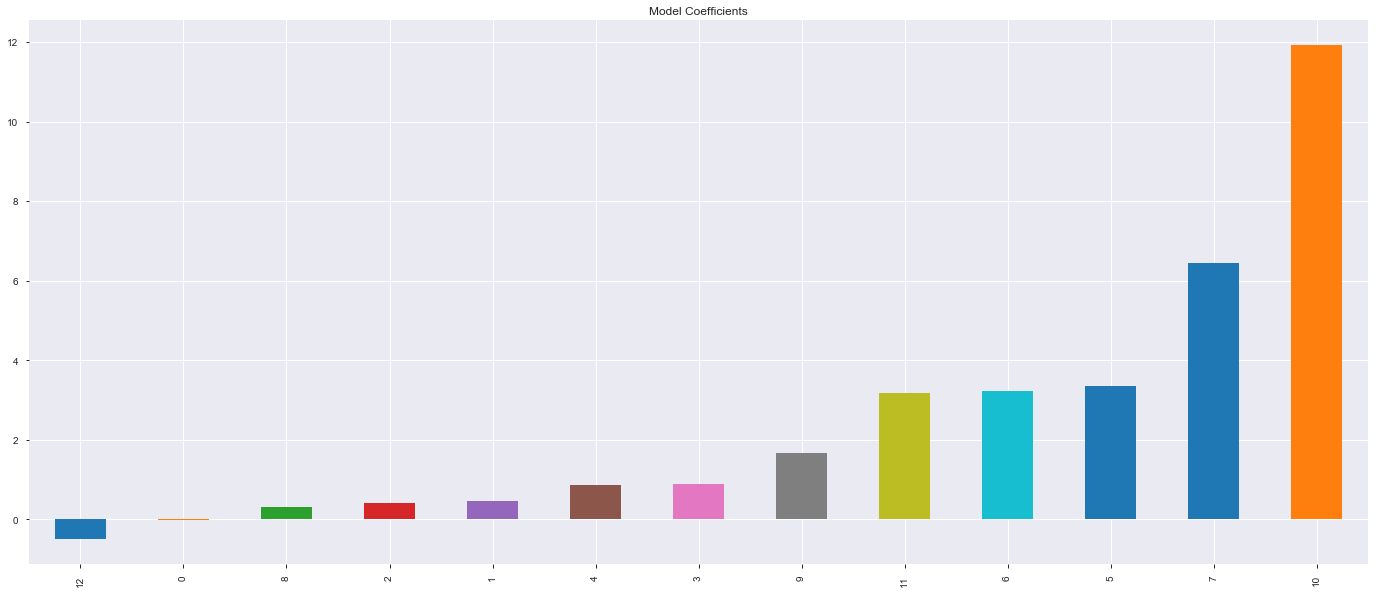

In [656]:
plt.figure(figsize=(24,10))

s = X_train.tolist()
s1= pd.DataFrame(s)
predictors = s1.columns

coef = pd.Series(ridge_reg_best.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients')


### Selected Features

<Figure size 1728x720 with 0 Axes>

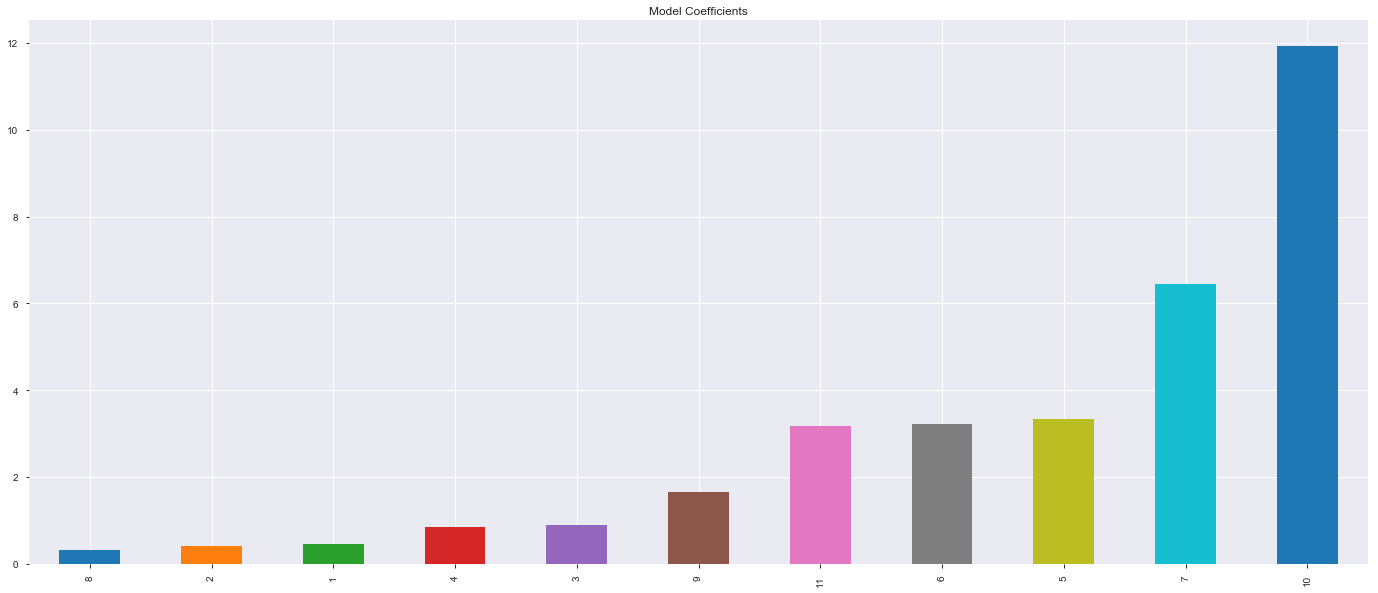

In [657]:
plt.figure(figsize=(24,10))

s = X_train.tolist()
s1= pd.DataFrame(s)
predictors = s1.columns

coef = pd.Series(ridge_reg_best.coef_,predictors).sort_values()

coef = coef[coef>0]

coef.plot(kind='bar', title='Model Coefficients')

### Lasso Regression

In [658]:
#import Lasso
from sklearn.linear_model import Lasso

In [659]:
lasso_reg = Lasso()
param_grid = {'alpha':[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1],
             'max_iter':[10000, 50000]}

gs_lasso = GridSearchCV(lasso_reg, param_grid, cv=5)
gs_lasso.fit(X_train, y_train)
gs_lasso.best_params_

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1], 'max_iter': [10000, 50000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'alpha': 0.06, 'max_iter': 10000}

In [660]:
lasso_reg_best = Lasso(alpha = 0.01, max_iter = 10000)
lasso_reg_best.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [661]:
y_test_pred_lasso = lasso_reg_best.predict(X_test)
R2_lasso = r2_score(y_test,y_test_pred_lasso)
R2_lasso

rmse_lasso = sqrt(mean_squared_error(y_test,y_test_pred_lasso))
rmse_lasso

list_model_rmse['Lasso Regression'] = rmse_lasso
list_model_r2['Lasso Regression'] = R2_lasso

0.778236119977548

4.998771360755107

<Figure size 1728x720 with 0 Axes>

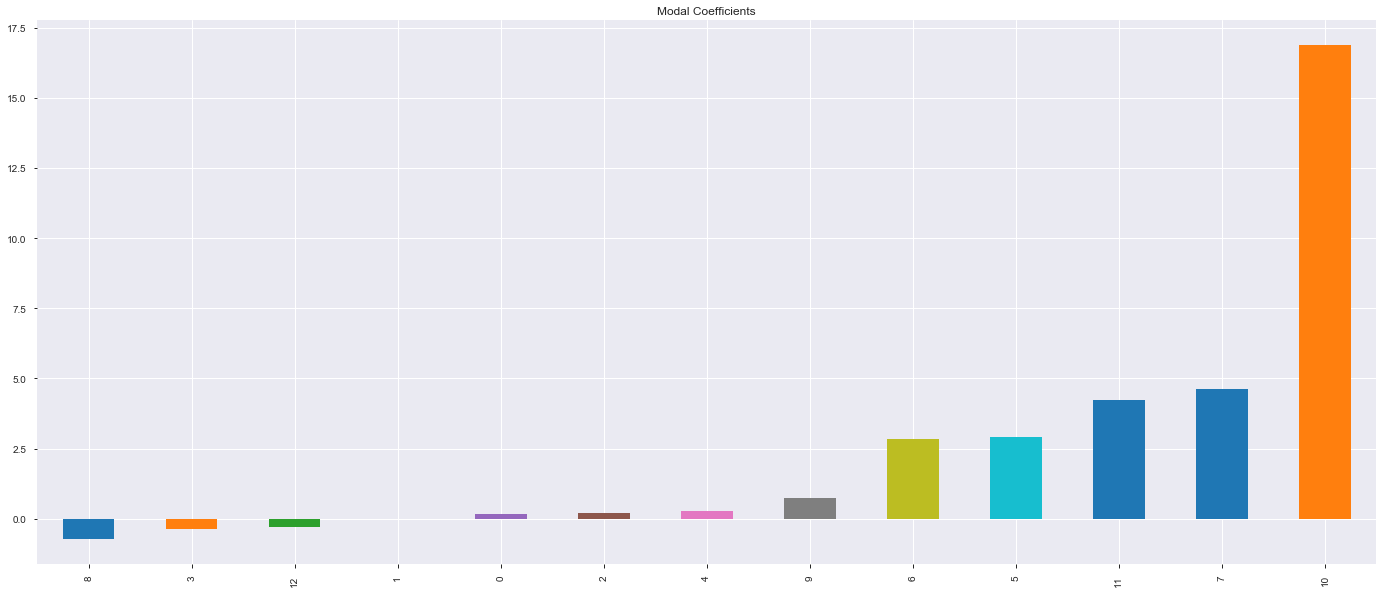

In [662]:
plt.figure(figsize=(24,10))
#predictors = X_train.columns

x = X_train.tolist()
x1= pd.DataFrame(x)
predictors = x1.columns

coef = pd.Series(lasso_reg_best.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

### Lasso Regression - Selected features

<Figure size 1728x720 with 0 Axes>

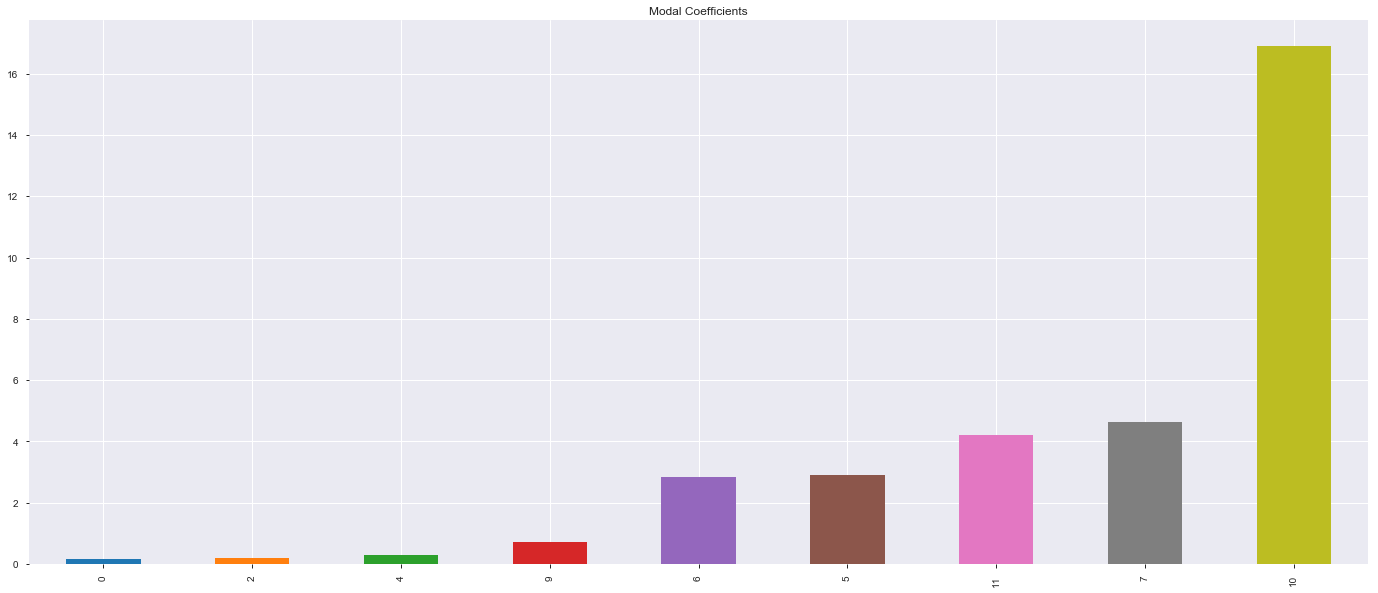

In [663]:
plt.figure(figsize=(24,10))
x = X_train.tolist()
x1= pd.DataFrame(x)
predictors = x1.columns

coef = pd.Series(lasso_reg_best.coef_,predictors).sort_values()

coef = coef[coef>0]

coef.plot(kind='bar', title='Modal Coefficients')

__SVR (with & without Kernels)__

In [664]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

for k in ['linear','poly','rbf','sigmoid']:
    clf1 = SVR(kernel=k, gamma='auto' )
    clf1.fit(X_train, y_train)
    confidence = clf1.score(X_test, y_test)
    print(k,confidence)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

linear 0.7127646066352655


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

poly 0.4559583604219989


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

rbf 0.7829283348808234


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

sigmoid 0.7563461307431493


I have already extracted the best features to run models on in the very beginning and according to the results our best regression model is Knn_Regressor with almost 87% accuracy

In [665]:
print("__________________________________________________________________________________________")

__________________________________________________________________________________________


### Classification

In [666]:
# Droping the "Risk" col and preforming the regression task.
audit_data = audit_data1.drop("Audit_Risk", axis=1)
audit_data.columns
audit_data.head()

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_C', 'Risk_C', 'Money_Value',
       'Score_D', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'History_score', 'N_LOCATION_ID', 'Risk'],
      dtype='object')

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_C,Risk_C,Money_Value,Score_D,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,History_score,N_LOCATION_ID,Risk
0,3.89,4.18,0.6,5.9982,2.500,0.2,0.5000,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2.0,0.2,0.4,0.0,0.2,0.0,2.4,8.5740,0.4,0.5,2.0,23.0,1
1,3.89,0.00,0.2,0.0000,4.830,0.2,0.9660,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2.0,0.2,0.4,0.0,0.2,0.0,2.0,2.5540,0.4,0.5,2.0,6.0,0
2,3.89,0.51,0.2,0.1020,0.230,0.2,0.0460,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2.0,0.2,0.4,0.0,0.2,0.0,2.0,1.5480,0.4,0.5,2.0,6.0,0
3,3.89,0.00,0.2,0.0000,62.172,0.6,37.3032,10.80,5.5,0.4,2.2,62.95,0.6,37.770,2.0,0.2,0.4,0.0,0.2,0.0,4.4,73.7058,0.4,0.5,2.0,6.0,1
4,3.89,0.00,0.2,0.0000,0.080,0.2,0.0160,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2.0,0.2,0.4,0.0,0.2,0.0,2.0,1.4160,0.4,0.5,2.0,6.0,0


In [667]:
#KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree

### Decision Tree

In [668]:
# Import for Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz #for implementing Decision tree and showing the graphs
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import svm
#import graphviz
from sklearn import tree


In [669]:
x_train, x_test, y_train, y_test = train_test_split(audit_data.drop(['Risk'], axis=1), audit_data[['Risk']],test_size = 0.2, 
random_state = 0 )

scaler1 = MinMaxScaler()
X_train1 = scaler1.fit_transform(x_train)
X_test1 = scaler1.transform(x_test)

In [670]:
Audit_risk = DecisionTreeClassifier(random_state=0)
Audit_risk.fit(x_train, y_train)
predictions = Audit_risk.predict(x_test)

print("Decision Tree")
print("\n")
print("Acuracy on training set: {:.3f}".format(Audit_risk.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(Audit_risk.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Decision Tree


Acuracy on training set: 100.000
Acuracy on test set: 98.693

 Confusion Matrix: 

[[82  2]
 [ 0 69]]

 Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        84
           1       0.97      1.00      0.99        69

   micro avg       0.99      0.99      0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153



### Support Vector Machine - Linear

In [671]:
clf = svm.LinearSVC()
clf.fit(x_train,y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(x_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(x_test, y_test) * 100, 2)))
predictions = clf.predict(x_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Train accuracy = 95.57%
Test accuracy = 95.42%

 Confusion Matrix: 

[[83  1]
 [ 6 63]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        84
           1       0.98      0.91      0.95        69

   micro avg       0.95      0.95      0.95       153
   macro avg       0.96      0.95      0.95       153
weighted avg       0.96      0.95      0.95       153



In [672]:
accuracy_test=[None]*100
accuracy_train=[None]*100
c = [None]*100
count=0
c[0] = 1
for i in range(100):
    clf = svm.LinearSVC(C= c[i], random_state=0)
    clf.fit(x_train, y_train)
    accuracy_train[i] = np.round(clf.score(x_train, y_train) * 100, 2)
    accuracy_test[i] = np.round(clf.score(x_test, y_test) * 100, 2)
    if i < 99:
        c[i+1] = c[i] + 0.5

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=1.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=2.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=2.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=3.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=3.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=4.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=4.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=5.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=5.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=6.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=6.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=7.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=7.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=8.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=8.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=9.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=9.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=10.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=10.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=11.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=11.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=12.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=12.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=13.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=13.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=14.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=14.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=15.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=15.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=16.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=16.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=17.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=17.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=18.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=18.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=19.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=19.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=20.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=20.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=21.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=21.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=22.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=22.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=23.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=23.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=24.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=24.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=25.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=25.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=26.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=26.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=27.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=27.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=28.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=28.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=29.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=29.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=30.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=30.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=31.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=31.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=32.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=32.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=33.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=33.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=34.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=34.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=35.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=35.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=36.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=36.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=37.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=37.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=38.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=38.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=39.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=39.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=40.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=40.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=41.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=41.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=42.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=42.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=43.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=43.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=44.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=44.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=45.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=45.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=46.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=46.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=47.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=47.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=48.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=48.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=49.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=49.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=50.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

LinearSVC(C=50.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

Text(0.5, 1.0, 'SVM | Accuracy vs C-value')

Text(0.5, 0, 'C-value')

Text(0, 0.5, 'Accuracy')

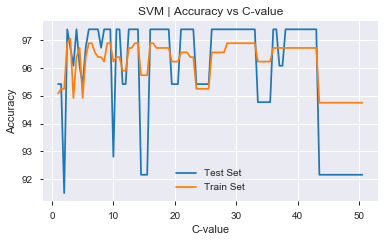

In [673]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(c,accuracy_test)
ax1.plot(c,accuracy_train)


plt.title("SVM | Accuracy vs C-value")
plt.xlabel("C-value")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

In [674]:
#start = time.time()

clf = svm.LinearSVC(C=2.0, random_state=0)
clf.fit(x_train,y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(x_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(x_test, y_test) * 100, 2)))
predictions = clf.predict(x_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

#end = time.time()
#timeTaken[0] =(end - start)
#timeTaken[0]
accuracy_train = np.round(clf.score(x_train, y_train) * 100, 2)
accuracy_test = np.round(clf.score(x_test, y_test) * 100, 2)

LinearSVC(C=2.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

Train accuracy = 95.25%
Test accuracy = 91.5%

 Confusion Matrix: 

[[83  1]
 [12 57]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.99      0.93        84
           1       0.98      0.83      0.90        69

   micro avg       0.92      0.92      0.92       153
   macro avg       0.93      0.91      0.91       153
weighted avg       0.92      0.92      0.91       153



### Support Vector Machine - Sigmoid Kernel

In [675]:
clf = svm.SVC(kernel='sigmoid', random_state= 0)
clf.fit(x_train, y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(x_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(x_test, y_test) * 100, 2)))
predictions = clf.predict(x_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

Train accuracy = 60.0%
Test accuracy = 54.25%

 Confusion Matrix: 

[[83  1]
 [69  0]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.55      0.99      0.70        84
           1       0.00      0.00      0.00        69

   micro avg       0.54      0.54      0.54       153
   macro avg       0.27      0.49      0.35       153
weighted avg       0.30      0.54      0.39       153



In [676]:
accuracy_test=[None]*100
accuracy_train=[None]*100
c = [None]*100
count=0
c[0] = 1
for i in range(100):
    clf = svm.SVC(C= c[i], kernel='sigmoid', random_state= 0)
    clf.fit(x_train, y_train)
    accuracy_train[i] = np.round(clf.score(x_train, y_train) * 100, 2)
    accuracy_test[i] = np.round(clf.score(x_test, y_test) * 100, 2)
    if i < 99:
        c[i+1] = c[i] + 0.5

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=3.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=4.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=4.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=5.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=6.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=6.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=7.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=7.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=8.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=8.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=9.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=9.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=10.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=11.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=11.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=12.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=12.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=13.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=13.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=14.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=14.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=15.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=15.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=16.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=16.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=17.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=17.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=18.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=18.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=19.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=19.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=20.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=20.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=21.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=21.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=22.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=22.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=23.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=23.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=24.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=24.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=25.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=25.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=26.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=26.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=27.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=27.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=28.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=28.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=29.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=29.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=30.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=30.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=31.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=31.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=32.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=32.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=33.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=33.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=34.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=34.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=35.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=35.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=36.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=36.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=37.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=37.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=38.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=38.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=39.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=39.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=40.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=40.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=41.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=41.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=42.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=42.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=43.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=43.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=44.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=44.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=45.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=45.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=46.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=46.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=47.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=47.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=48.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=48.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=49.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=49.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=50.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=50.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

Text(0.5, 1.0, 'SVM | Accuracy vs C-value')

Text(0.5, 0, 'C-value')

Text(0, 0.5, 'Accuracy')

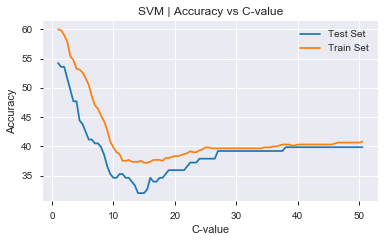

In [677]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(c,accuracy_test)
ax1.plot(c,accuracy_train)


plt.title("SVM | Accuracy vs C-value")
plt.xlabel("C-value")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

In [678]:
#start = time.time()

clf = svm.SVC(kernel='sigmoid', C=1.0)
clf.fit(x_train, y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(x_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(x_test, y_test) * 100, 2)))
predictions = clf.predict(x_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

#end = time.time()

#timeTaken[2] =(end - start)
#timeTaken[2]
accuracy_train = np.round(clf.score(x_train, y_train) * 100, 2)
accuracy_test = np.round(clf.score(x_test, y_test) * 100, 2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Train accuracy = 60.0%
Test accuracy = 54.25%

 Confusion Matrix: 

[[83  1]
 [69  0]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.55      0.99      0.70        84
           1       0.00      0.00      0.00        69

   micro avg       0.54      0.54      0.54       153
   macro avg       0.27      0.49      0.35       153
weighted avg       0.30      0.54      0.39       153



### K Nearest Neighbour Classification

In [679]:
from sklearn.neighbors import KNeighborsClassifier

In [680]:
score = [None]*10
j = 0
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    score[j]= knn.score(x_test,y_test)
    j = j +1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

Text(0.5, 1.0, 'KNN | Accuracy Vs Neighbours')

Text(0.5, 0, 'Neighbours')

Text(0, 0.5, 'Accuracy')

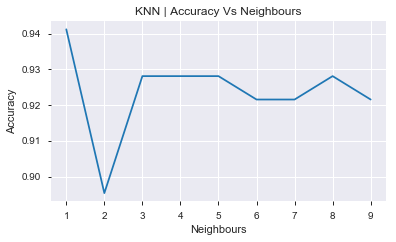

In [681]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)

ax1.plot(range(1,11),score)


plt.title("KNN | Accuracy Vs Neighbours")
plt.xlabel("Neighbours")
plt.ylabel("Accuracy")

In [682]:
classifier = KNeighborsClassifier(n_neighbors=1)  
classifier.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [683]:
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Acuracy on training set: {:.3f}".format(clf.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(clf.score(x_test, y_test)*100))

[[80  4]
 [ 5 64]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        84
           1       0.94      0.93      0.93        69

   micro avg       0.94      0.94      0.94       153
   macro avg       0.94      0.94      0.94       153
weighted avg       0.94      0.94      0.94       153

Acuracy on training set: 60.000
Acuracy on test set: 54.248


### Logistic Regression

In [684]:
from sklearn.linear_model import LogisticRegression

In [685]:
clf = LogisticRegression(random_state=0, solver='liblinear',multi_class='ovr').fit(x_train, y_train)

In [686]:
clf_prd = clf.predict(x_test)
print(confusion_matrix(y_test, clf_prd))  
print(classification_report(y_test, clf_prd))
print("Acuracy on training set: {:.3f}".format(clf.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(clf.score(x_test, y_test)*100))

[[84  0]
 [ 1 68]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        84
           1       1.00      0.99      0.99        69

   micro avg       0.99      0.99      0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153

Acuracy on training set: 98.689
Acuracy on test set: 99.346


The best classification model according to above model implementation came out to be Logistics regression as it has the highest test score and it doees not looks overfit like decision tree where its training score is 100% and its recall is also highest